In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
from pyspark.mllib.stat import Statistics
%matplotlib inline

In [2]:
# data loading in 
data = pd.read_csv('./NYPD_Complaint_Data_Historic.csv')

/Users/apple/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Geographic Information

In [4]:
geo_information = data[['BORO_NM','ADDR_PCT_CD','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Lat_Lon']]

44.0

In [5]:
geo_information.fillna('MISSING', inplace=True)

/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [6]:
Borough_dis = geo_information.groupby(['BORO_NM']).count()

In [7]:
Borough_dis

,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
BORO_NM,,,,,,
BRONX,1103514,1103514,1103514,1103514,1103514,1103514
BROOKLYN,1526213,1526213,1526213,1526213,1526213,1526213
MANHATTAN,1216249,1216249,1216249,1216249,1216249,1216249
MISSING,463,463,463,463,463,463
QUEENS,1011002,1011002,1011002,1011002,1011002,1011002
STATEN ISLAND,243790,243790,243790,243790,243790,243790


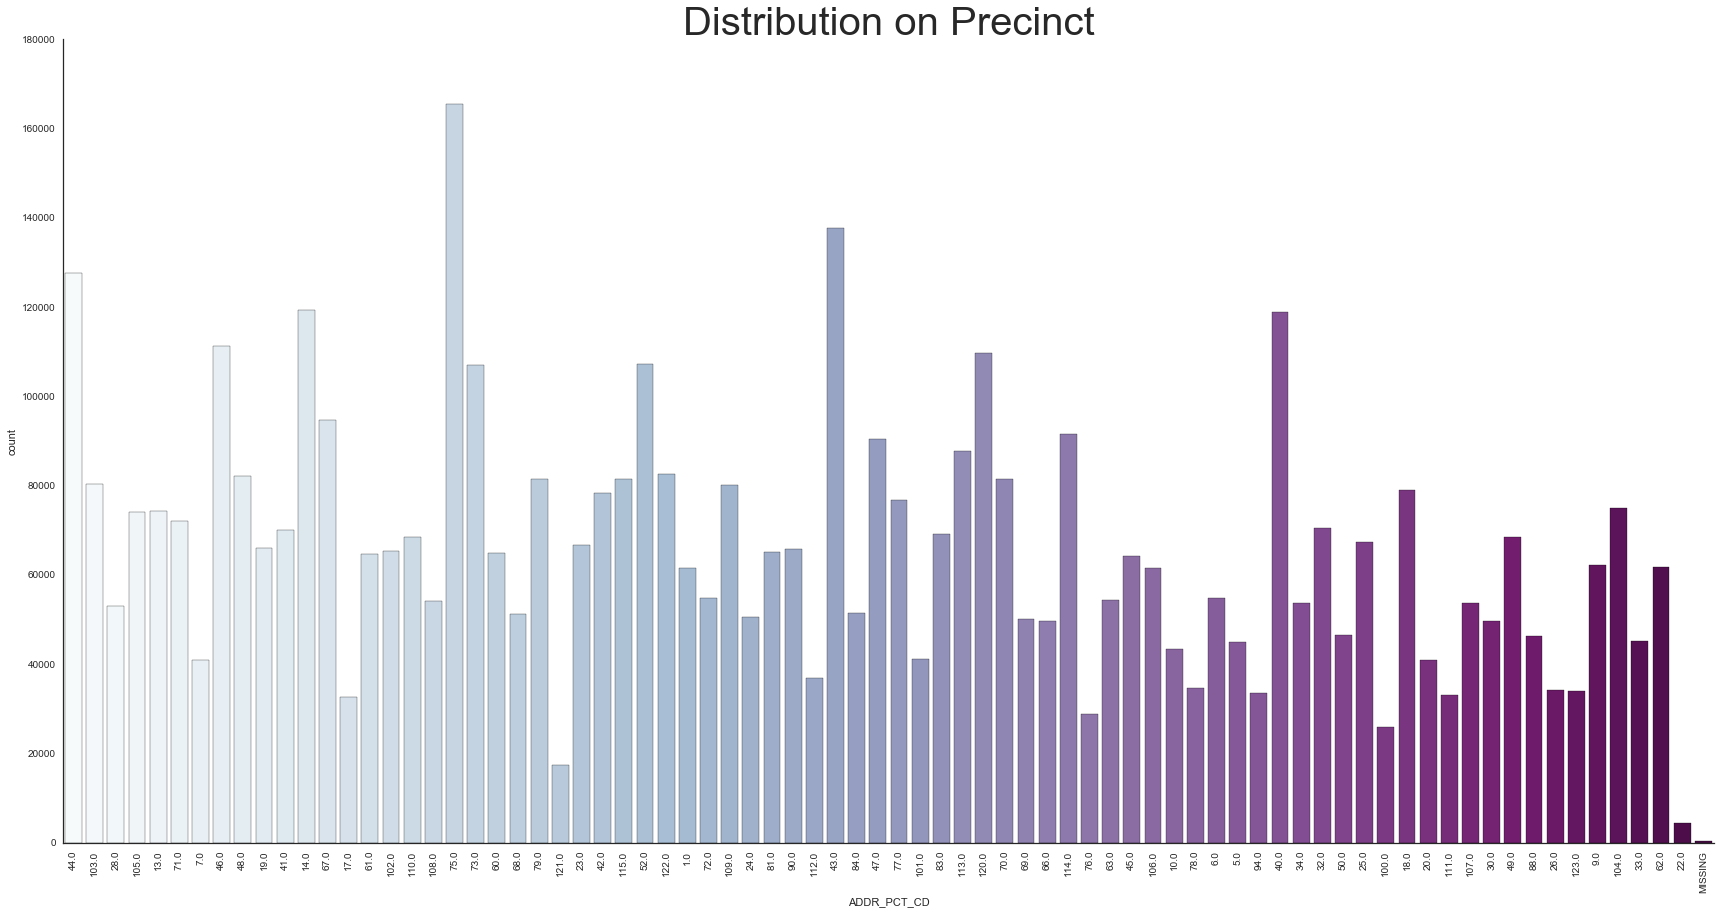

In [16]:
sns.set(style="white")
with sns.plotting_context(font_scale=5.5):
     # Draw a count plot to show the number of planets discovered each year
    g = sns.factorplot(x="ADDR_PCT_CD", data=geo_information, kind="count",palette="BuPu", size=12, aspect=2)
    g.set_xticklabels(step=1,rotation=90,fontsize=10)
    sns.plt.title('Distribution on Precinct',fontsize=40)

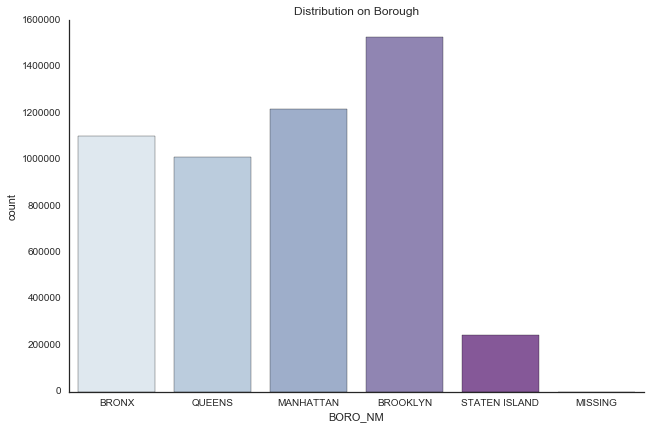

In [15]:
sns.set(style="white")
g = sns.factorplot(x="BORO_NM", data=geo_information, kind="count",palette="BuPu", size=6, aspect=1.5,label='big')
g.set_xticklabels(step=1)
sns.plt.title('Distribution on Borough')

In [5]:
time_type = data[['CMPLNT_FR_DT','CMPLNT_FR_TM','OFNS_DESC','PD_DESC','CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC','PREM_TYP_DESC', 'PARKS_NM','HADEVELOPT',]]

In [13]:
import datetime
time_type['hour'] = list(map(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"), time_type['CMPLNT_FR_DT']))

TypeError: strptime() argument 1 must be str, not float

In [93]:
PREM = data[['CMPLNT_FR_TM','PREM_TYP_DESC']].dropna()

In [97]:
PREM['hour'] = list(map(lambda x: x[:2] if x[:2]!='24' else '00',PREM['CMPLNT_FR_TM']))

In [98]:
table = pd.pivot_table(PREM, index=['PREM_TYP_DESC'],
                  columns=['hour'], aggfunc='count').fillna(0)

In [99]:
table

CMPLNT_FR_TM                                      \
hour                                   00       01       02       03       04   
PREM_TYP_DESC                                                                   
ABANDONED BUILDING                  218.0     80.0     47.0     31.0     29.0   
AIRPORT TERMINAL                    427.0    186.0    102.0     86.0    226.0   
ATM                                 394.0    109.0    102.0     88.0     93.0   
BANK                                985.0    181.0    139.0    145.0    117.0   
BAR/NIGHT CLUB                     5868.0   8294.0   9270.0   9271.0   4774.0   
BEAUTY & NAIL SALON                 293.0    166.0    128.0    119.0     82.0   
BOOK/CARD                            14.0      9.0      5.0      4.0      5.0   
BRIDGE                              502.0    433.0    446.0    459.0    450.0   
BUS (NYC TRANSIT)                   164.0    117.0     70.0     51.0     39.0   
BUS (OTHER)                          45.0     28.0     29.0     17.0     18.0   
BUS STOP                            173.0     94.0     80.0     63.0     61.0   
BUS TERMINAL                        110.0     88.0     50.0     41.0     64.0   
CANDY STORE                         286.0    206.0    162.0    124.0    107.0   
CEMETERY                             23.0     15.0     14.0      5.0      7.0   
CHAIN STORE                        1123.0    703.0    578.0    544.0    488.0   
CHECK CASHING BUSINESS              188.0     73.0     48.0     52.0     47.0   
CHURCH                              293.0    163.0    134.0     76.0     76.0   
CLOTHING/BOUTIQUE                   253.0    136.0    129.0    114.0    114.0   
COMMERCIAL BUILDING                4366.0   1913.0   1649.0   1387.0   1177.0   
CONSTRUCTION SITE                   331.0    183.0    175.0    166.0    124.0   
DEPARTMENT STORE                    496.0    180.0    151.0    120.0    107.0   
DOCTOR/DENTIST OFFICE               299.0     74.0     56.0     57.0     58.0   
DRUG STORE                          569.0    500.0    416.0    370.0    329.0   
DRY CLEANER/LAUNDRY                 364.0    226.0    237.0    194.0    167.0   
FACTORY/WAREHOUSE                   314.0    137.0     92.0     84.0     89.0   
FAST FOOD                           967.0    831.0    715.0    592.0    588.0   
FERRY/FERRY TERMINAL                 55.0     44.0     35.0     42.0     19.0   
FOOD SUPERMARKET                    423.0    302.0    238.0    213.0    227.0   
GAS STATION                         566.0    472.0    401.0    418.0    416.0   
GROCERY/BODEGA                     2906.0   1957.0   1656.0   1343.0   1336.0   
...                                   ...      ...      ...      ...      ...   
OTHER                              6505.0   3504.0   2727.0   2245.0   1934.0   
OTHER HOUSE OF WORSHIP               33.0     11.0     12.0      8.0     10.0   
PARK/PLAYGROUND                    1756.0   1287.0    733.0    464.0    312.0   
PARKING LOT/GARAGE (PRIVATE)       1121.0    772.0    643.0    534.0    497.0   
PARKING LOT/GARAGE (PUBLIC)         881.0    717.0    542.0    465.0    428.0   
PHOTO/COPY                           24.0     15.0     12.0      7.0      6.0   
PRIVATE/PAROCHIAL SCHOOL            126.0     75.0     53.0     42.0     43.0   
PUBLIC BUILDING                    1212.0    837.0    602.0    478.0    351.0   
PUBLIC SCHOOL                       362.0    187.0     95.0     83.0     70.0   
RESIDENCE - APT. HOUSE            59137.0  33639.0  26179.0  21044.0  18308.0   
RESIDENCE - PUBLIC HOUSING        20792.0  15019.0   9503.0   7056.0   5238.0   
RESIDENCE-HOUSE                   26978.0  14530.0  10851.0   8696.0   7448.0   
RESTAURANT/DINER                   2841.0   2267.0   1798.0   1598.0   1604.0   
SHOE                                 44.0     21.0     16.0     15.0     16.0   
SMALL MERCHANT                      628.0    358.0    240.0    174.0    184.0   
SOCIAL CLUB/POLICY                  260.0    321.0    355.0 

([<matplotlib.axis.XTick at 0x1445d9cc0>,
 <a list of 70 Text xticklabel objects>)

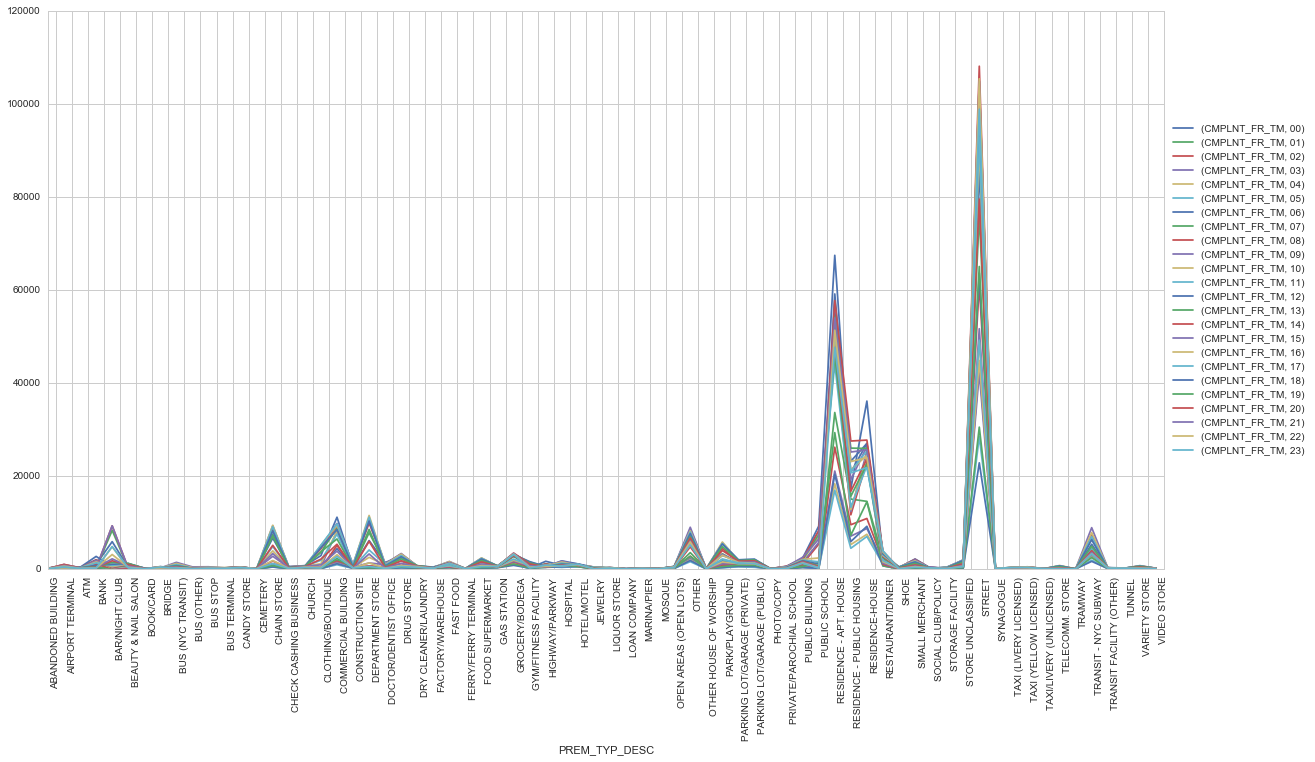

In [122]:
table.plot(figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(0.5, len(table.index), 1),table.index , rotation=90,fontsize=10)

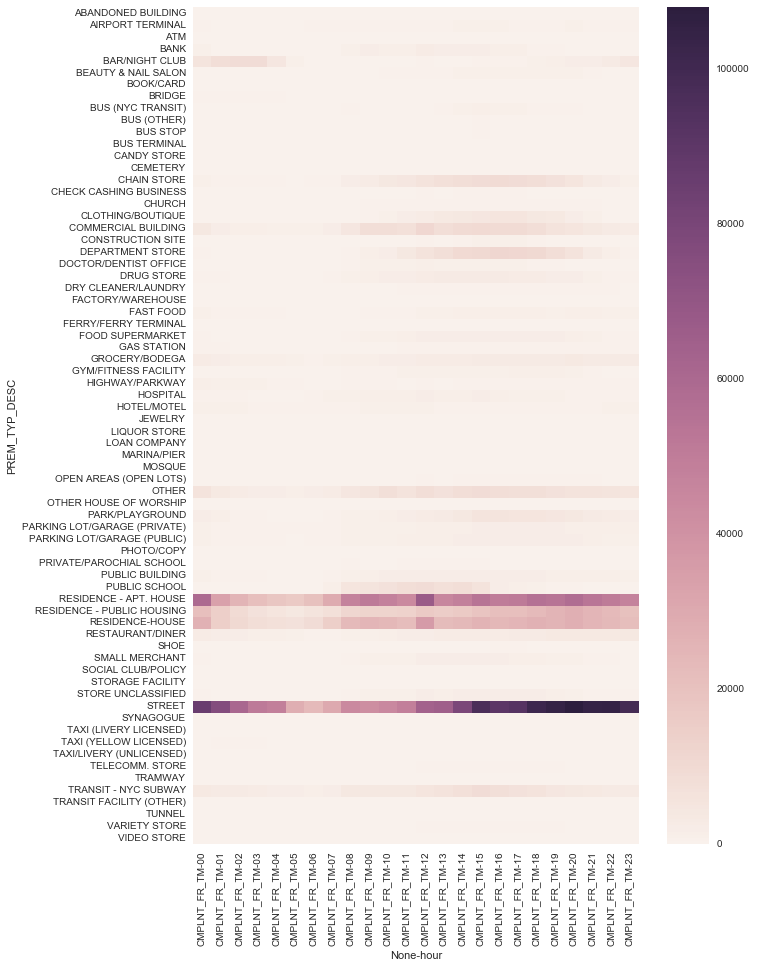

In [124]:
plt.figure(figsize=(10,15))
sns.heatmap(table)

([<matplotlib.axis.XTick at 0x143308c88>,
 <a list of 24 Text xticklabel objects>)

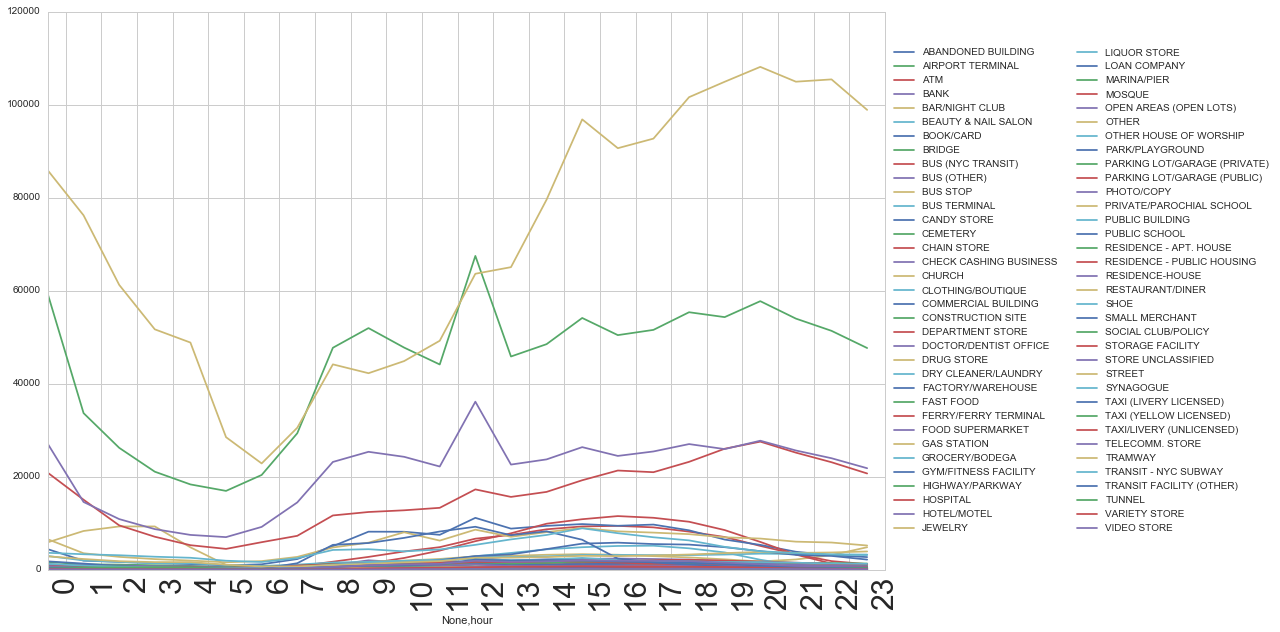

In [120]:
table_T = table.T
table_T.plot(figsize=(15,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=2)
plt.xticks(np.arange(0.5, 24, 1), list(range(24)), rotation=90,fontsize=30)

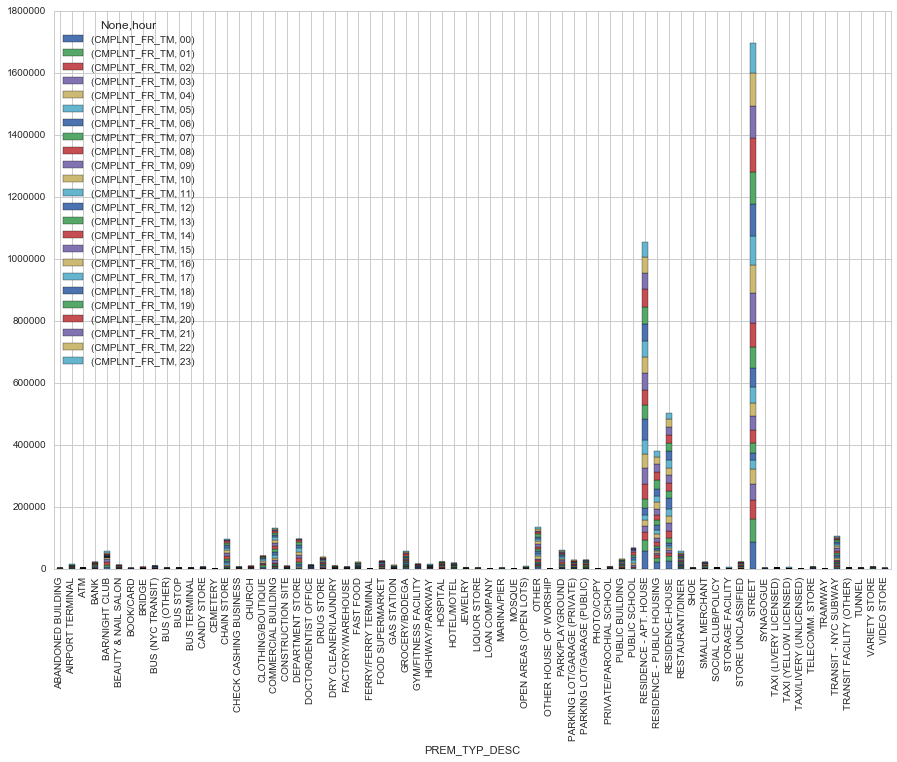

In [101]:
table.plot.bar(stacked=True,figsize=(15,10))

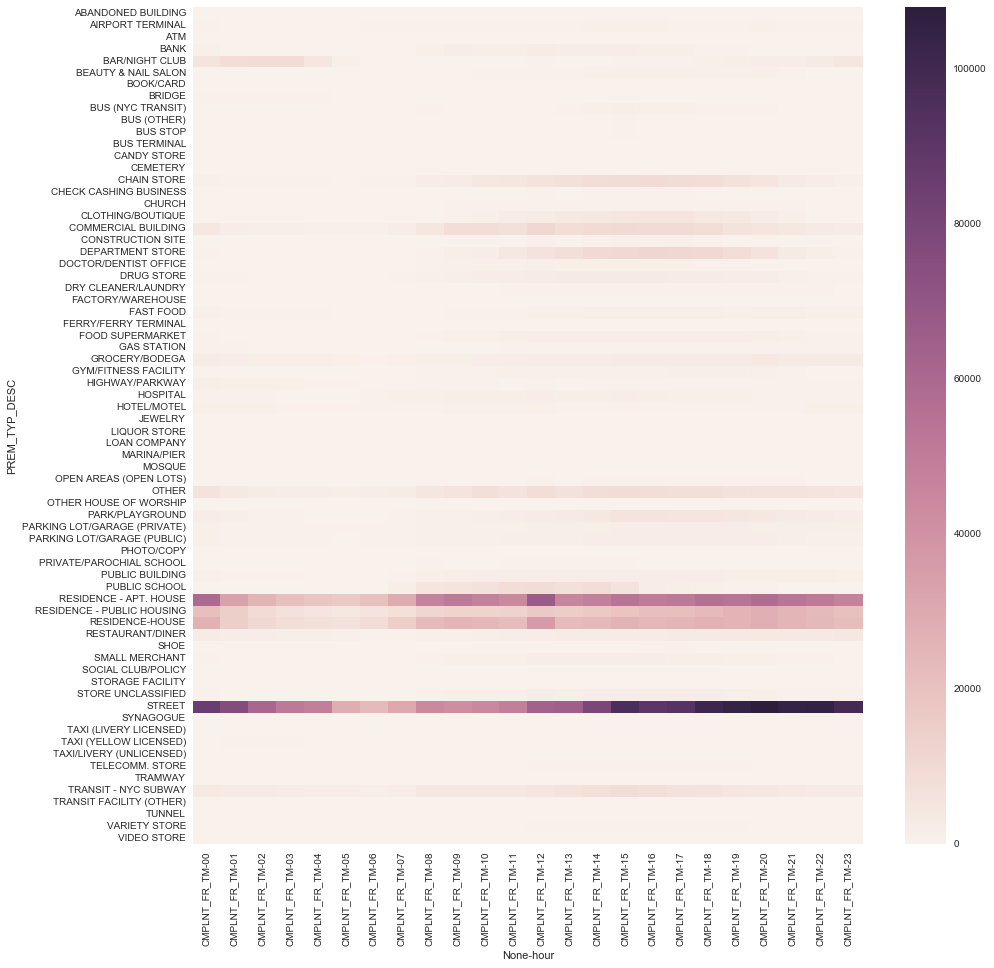

In [100]:
plt.figure(figsize=(15,15))
sns.heatmap(table)

In [65]:
OFN_PREM = data[['PREM_TYP_DESC','OFNS_DESC']].dropna()
OFN_PREM['Count'] = [1]*len(OFN_PREM)
table = pd.pivot_table(OFN_PREM, values='Count', index=['OFNS_DESC'],
                  columns=['PREM_TYP_DESC'], aggfunc=np.sum).fillna(0)

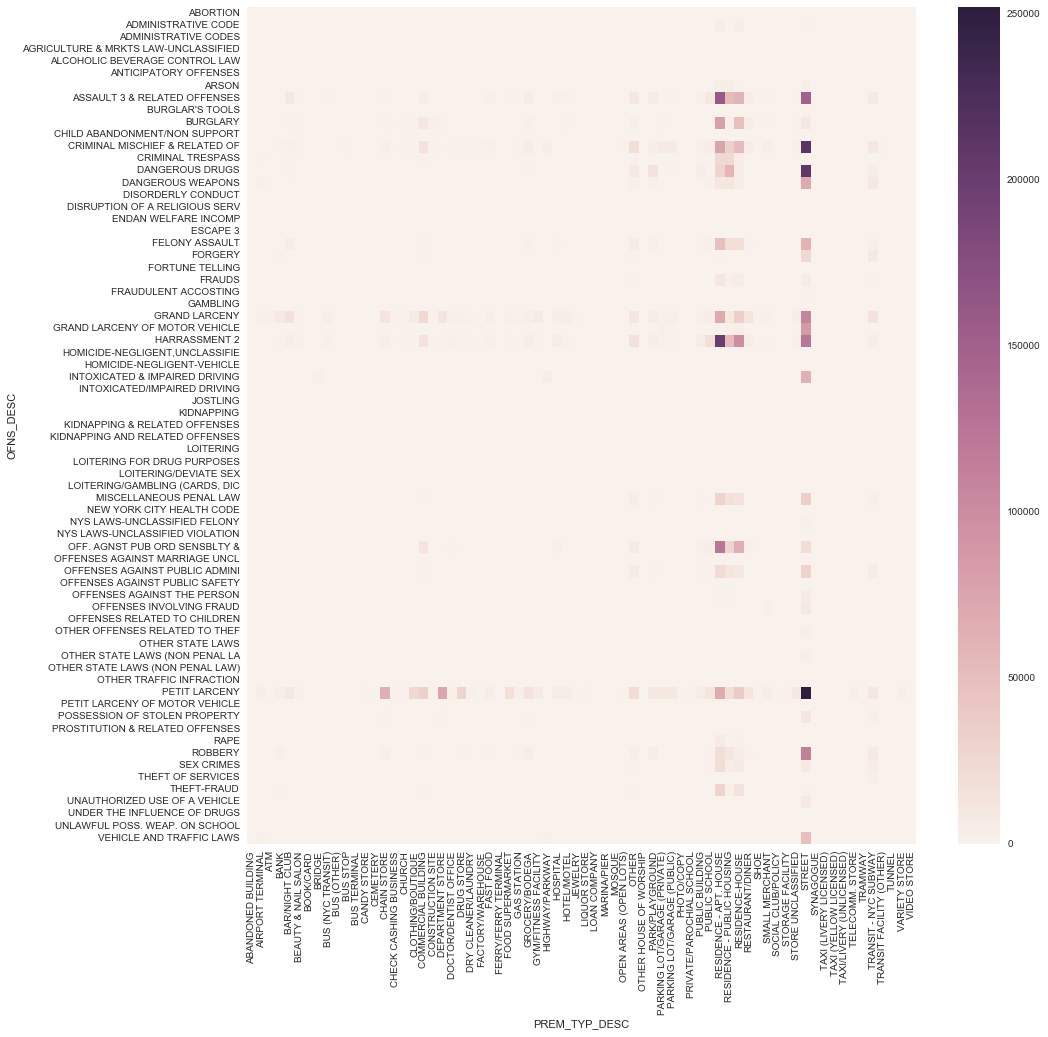

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(table)

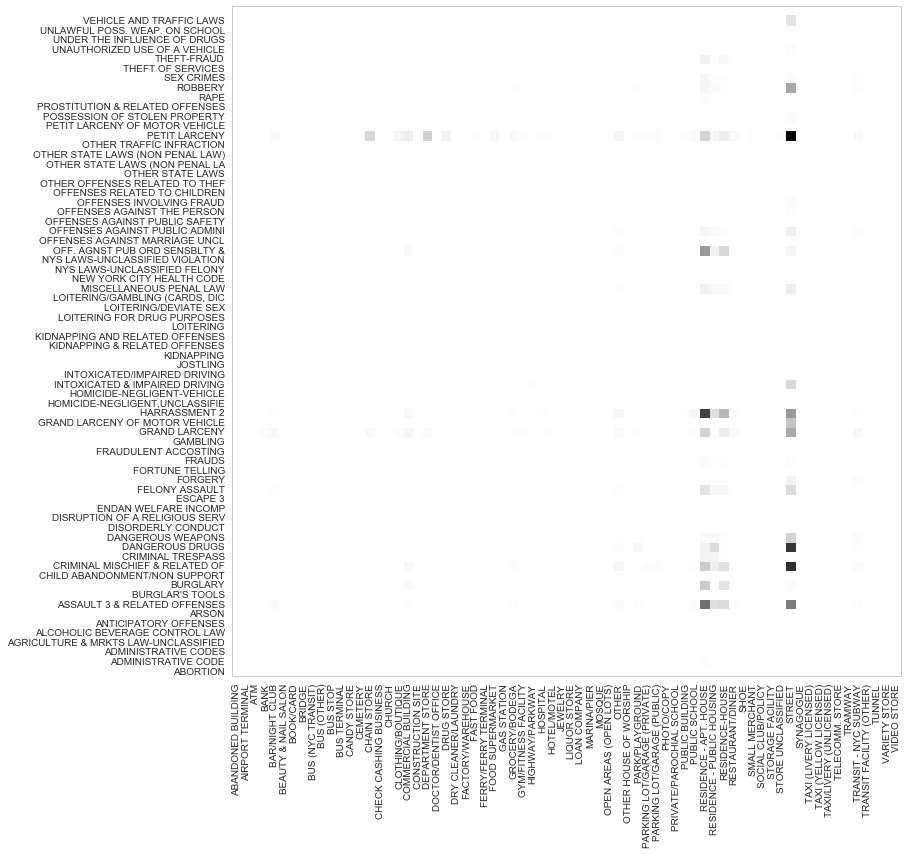

In [75]:
plt.figure(figsize=(12,12))
plt.pcolor(table)
plt.yticks(np.arange(0.5, len(table.index), 1), table.index)
plt.xticks(np.arange(0.5, len(table.columns), 1), table.columns, rotation=90)
plt.show()

In [12]:
datetime.datetime.strptime(time_type['CMPLNT_FR_DT'][0], "%m/%d/%Y")

datetime.datetime(2015, 12, 31, 0, 0)

In [24]:
LAW_CAT_CDandOFNS_DESC = data[['OFNS_DESC','LAW_CAT_CD']].dropna()

In [25]:
LAW_CAT_CDandOFNS_DESC['Count'] = [1]*len(LAW_CAT_CDandOFNS_DESC)

In [54]:
table = pd.pivot_table(LAW_CAT_CDandOFNS_DESC, values='Count', index=['OFNS_DESC'],
                  columns=['LAW_CAT_CD'], aggfunc=np.sum).fillna(0)

In [55]:
table['Total'] = table['FELONY']+table['MISDEMEANOR']+table['VIOLATION']
table['OFNS_DESC']=table.index


In [49]:
table['FELONY'] = table['FELONY']/sum(table['FELONY'])
table['MISDEMEANOR'] = table['MISDEMEANOR']/sum(table['MISDEMEANOR'])
table['VIOLATION'] = table['VIOLATION']/sum(table['VIOLATION'])
table['Total'] = table['Total']/sum(table['Total'])

In [62]:
table['FELONY_rio'] = table['FELONY']/table['Total']
table['MISDEMEANOR_rio'] = table['MISDEMEANOR']/table['Total']
table['VIOLATION_rio'] = table['VIOLATION']/table['Total']
table['Total_rio'] = table['Total']/table['Total']

In [60]:
table = table.sort(columns = ['Total'], ascending=False)

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


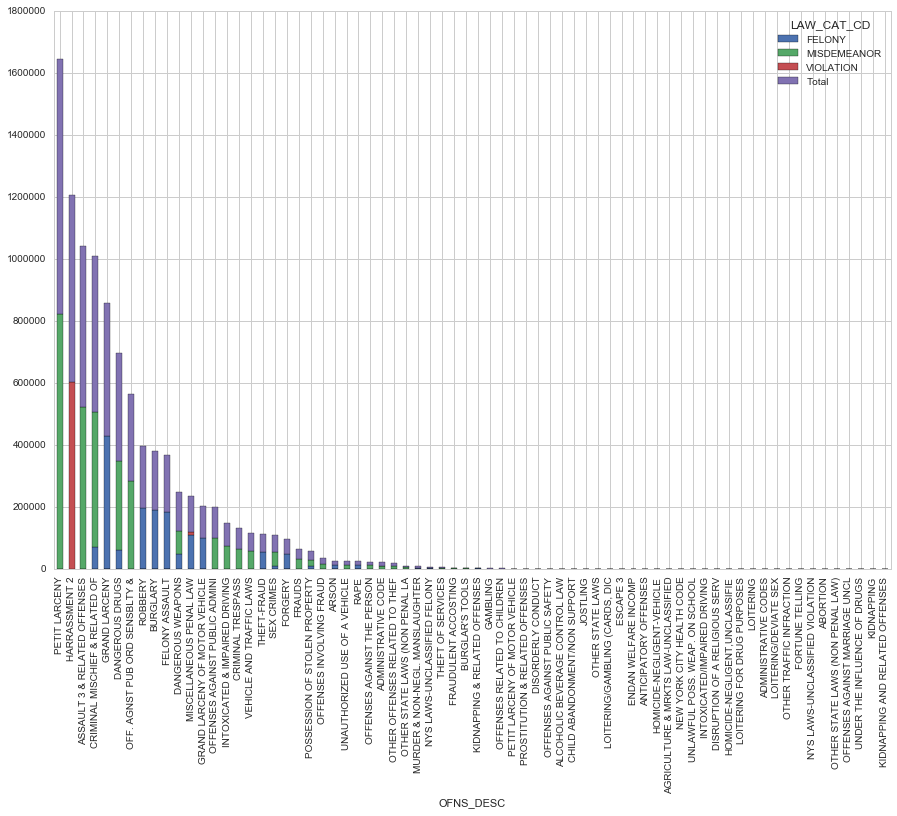

In [61]:
table.plot.bar(stacked=True,figsize=(15,10))
plt.title('')

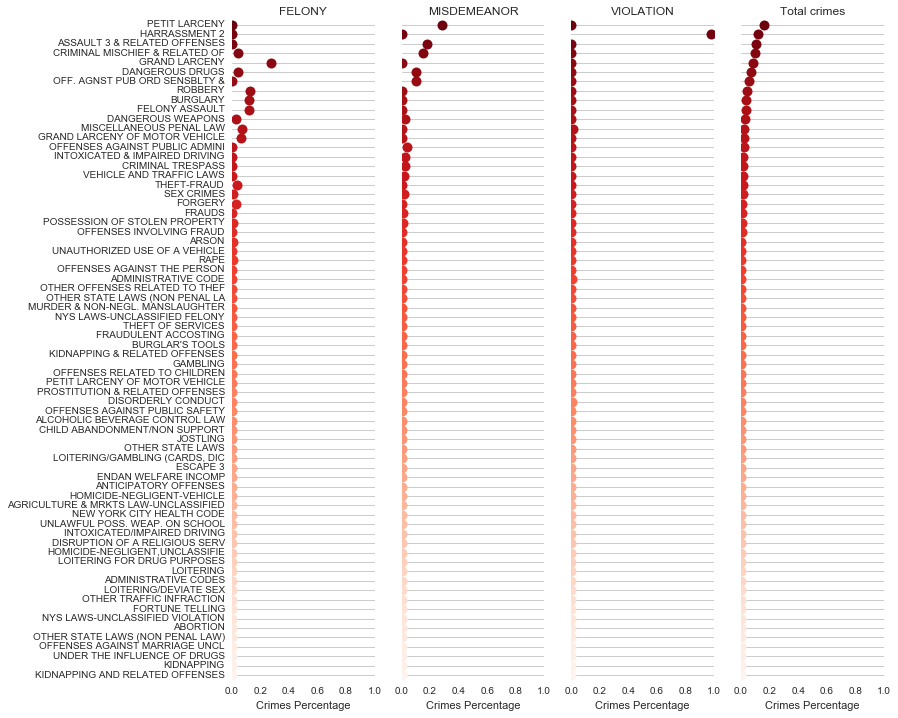

In [53]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
#crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(table.sort_values("Total", ascending=False),
                 x_vars=table.columns[:4], y_vars=["OFNS_DESC"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set( xlim=(0, 1),xlabel="Crimes Percentage", ylabel="")#xlim=(0, 25),

# Use semantically meaningful titles for the columns
titles = [ 'FELONY', 'MISDEMEANOR', 'VIOLATION',"Total crimes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [32]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL
